In [1]:
import os,sys
from importlib import reload
import numpy as np
import pandas as pd
#import torch
print(os.getpid())
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

1623025


In [2]:
pool_folder = r'/lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/NewTargetSites'
print(pool_folder)
print(os.path.exists(pool_folder))
library_folder = os.path.join(pool_folder, 'IntBC_MERFISH_v2')
print(library_folder)
if not os.path.exists(library_folder):
    os.makedirs(library_folder)

/lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/NewTargetSites
True
/lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/NewTargetSites/IntBC_MERFISH_v2


In [3]:
# check integration barcode designs:
# Version1:
#library_filename = r'/lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/RandomSeqBarcode_new/20230404-final_sorted_seqs_Twist.xlsx'
#library_df = pd.read_excel(library_filename)
# Version2:
library_filename = r'/lab/solexa_weissman/PEtracing_shared/Reference/PETS_MFBC_v2_whitelist.txt'
library_df = pd.read_csv(library_filename, delimiter='\t', header=None, names=['name','seq'])

num_unique_probes = np.sum(['_rc' not in _n for _n in library_df['name']])
print(f"Number of unique target_sites: {num_unique_probes}")

Number of unique target_sites: 2171


In [8]:
library_df['seq'][0]

'TGTATTTGTGAGGGCCCAACCACGACGTAAGGTGAATTGTTGCTGCGTTCAGTCGTAAATGTTCGGATTCGCCCTATATCTGTGGCGCACTAGCATTGAAGCTGTAATTCCTCCGTATTACACTAGTTACTTGAGGTAGCCGCCCTGTCTAGTTAATGCTATGCCCGGTCGACCGCGTGGAAAgaatccagctagctgtgcagcGTAACCAGTAAAGGAAATCGCGGTTGTCAC'

In [16]:
# save this target_sites:
target_site_filename = os.path.join(library_folder, 'PETS_orthoSeq_targets.xlsx')
if not os.path.isfile(target_site_filename):
    print(target_site_filename)
    library_df.to_excel(target_site_filename, index=None)

/lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/NewTargetSites/IntBC_MERFISH_v2/PETS_orthoSeq_targets.xlsx


In [17]:
# reload target sites:
target_df = pd.read_excel(target_site_filename)
# determine number
num_unique_probes = np.sum(['_rc' not in _n for _n in target_df['name']])
print(f"Number of unique target_sites: {num_unique_probes}")

In [18]:
target_df

,name,seq
0,intID1,TGTATTTGTGAGGGCCCAACCACGACGTAAGGTGAATTGTTGCTGC...
1,intID2,GGATCTTACAGGACTACTCAAGTGGTGGTTTACGTTCCGTCTCACC...
2,intID3,TGGGAGTGAGCTTACCATCGAACAAATCCTTAGAGGCTGATGCTGG...
3,intID4,ATGTGCGGTAGCGCCCACTATTAGAGGCAGGCTAATCCCCTATGGA...
4,intID5,AATAATGCGTCTCCTGTAGGTTAAAGCAGGGCACCATCGTTGCTTA...
...,...,...
2166,intID2167,AGTCAATCTAGACCATCCATTGCGTCAAGCGGCGTCTGTCTAATTC...
2167,intID2168,CCCGGCCCAAATAAAATTTAGCCATGCGGCTTTCACCAAAACTCTG...
2168,intID2169,CCTTTGTTAGCGCGACCAAAGGAGGTGATTTTCGGCACGCACACAC...
2169,intID2170,ACACGTCCCCGGTATGATTCCTTGGGTAACTTTGATGCTGGACCGT...


# Part 1: MERFISH encoding design:

> download covering from website: [link](https://ljcr.dmgordon.org/cover/table.html#t=6)
>
> filter covering

## Load covering design

In [20]:
# analysis 
from ChromAn.src.library_tools.design_codebook import barcode_to_matrix, HammingDist_for_matrix, remove_bad_barcodes

In [21]:
covering_folder = '/lab/solexa_weissman/puzheng/References/Encoding_Design'
#covering_folder = r'Y:\References\Encoding_Design' # mapped this folder in Windows

num_bits = 21
hamming_weight = 6
hamming_distance = 4


covering_design_filename = os.path.join(covering_folder, f'covering_v{num_bits}_k{hamming_weight}_t{int(hamming_weight + 1 - (hamming_distance / 2))}.txt')
print(covering_design_filename)
design_df = pd.read_csv(covering_design_filename, header=None, delimiter='\s+')
print(len(design_df))
design_barcodes = design_df.values - 1

design_matrix = barcode_to_matrix(design_barcodes)


/lab/solexa_weissman/puzheng/References/Encoding_Design/covering_v21_k6_t5.txt
3908


In [22]:
distmat = HammingDist_for_matrix(design_matrix)

minimum hamming distance: 2


In [23]:
len(design_df)

3908

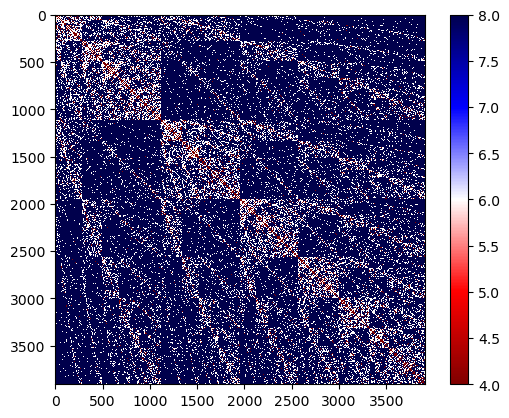

In [24]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(distmat, cmap='seismic_r', vmin=4, vmax=8, interpolation='nearest')
plt.colorbar()
plt.show()

## Filtering

In [25]:
reduced_design_barcodes = remove_bad_barcodes(design_barcodes)


minimum hamming distance: 2
2 3908
minimum hamming distance: 2
2 3907
minimum hamming distance: 2
2 3906
minimum hamming distance: 2
2 3905
minimum hamming distance: 2
2 3904
minimum hamming distance: 2
2 3903
minimum hamming distance: 2
2 3902
minimum hamming distance: 2
2 3901
minimum hamming distance: 2
2 3900
minimum hamming distance: 2
2 3899
minimum hamming distance: 2
2 3898
minimum hamming distance: 2
2 3897
minimum hamming distance: 2
2 3896
minimum hamming distance: 2
2 3895
minimum hamming distance: 2
2 3894
minimum hamming distance: 2
2 3893
minimum hamming distance: 2
2 3892
minimum hamming distance: 2
2 3891
minimum hamming distance: 2
2 3890
minimum hamming distance: 2
2 3889
minimum hamming distance: 2
2 3888
minimum hamming distance: 2
2 3887
minimum hamming distance: 2
2 3886
minimum hamming distance: 2
2 3885
minimum hamming distance: 2
2 3884
minimum hamming distance: 2
2 3883
minimum hamming distance: 2
2 3882
minimum hamming distance: 2
2 3881
minimum hamming dist

2 3674
minimum hamming distance: 2
2 3673
minimum hamming distance: 2
2 3672
minimum hamming distance: 2
2 3671
minimum hamming distance: 2
2 3670
minimum hamming distance: 2
2 3669
minimum hamming distance: 2
2 3668
minimum hamming distance: 2
2 3667
minimum hamming distance: 2
2 3666
minimum hamming distance: 2
2 3665
minimum hamming distance: 2
2 3664
minimum hamming distance: 2
2 3663
minimum hamming distance: 2
2 3662
minimum hamming distance: 2
2 3661
minimum hamming distance: 2
2 3660
minimum hamming distance: 2
2 3659
minimum hamming distance: 2
2 3658
minimum hamming distance: 2
2 3657
minimum hamming distance: 2
2 3656
minimum hamming distance: 2
2 3655
minimum hamming distance: 2
2 3654
minimum hamming distance: 2
2 3653
minimum hamming distance: 2
2 3652
minimum hamming distance: 2
2 3651
minimum hamming distance: 2
2 3650
minimum hamming distance: 2
2 3649
minimum hamming distance: 2
2 3648
minimum hamming distance: 2
2 3647
minimum hamming distance: 2
2 3646
minimum hammi

2 3439
minimum hamming distance: 2
2 3438
minimum hamming distance: 2
2 3437
minimum hamming distance: 2
2 3436
minimum hamming distance: 2
2 3435
minimum hamming distance: 2
2 3434
minimum hamming distance: 2
2 3433
minimum hamming distance: 2
2 3432
minimum hamming distance: 2
2 3431
minimum hamming distance: 2
2 3430
minimum hamming distance: 2
2 3429
minimum hamming distance: 2
2 3428
minimum hamming distance: 2
2 3427
minimum hamming distance: 2
2 3426
minimum hamming distance: 2
2 3425
minimum hamming distance: 2
2 3424
minimum hamming distance: 2
2 3423
minimum hamming distance: 2
2 3422
minimum hamming distance: 2
2 3421
minimum hamming distance: 2
2 3420
minimum hamming distance: 2
2 3419
minimum hamming distance: 2
2 3418
minimum hamming distance: 2
2 3417
minimum hamming distance: 2
2 3416
minimum hamming distance: 2
2 3415
minimum hamming distance: 2
2 3414
minimum hamming distance: 2
2 3413
minimum hamming distance: 2
2 3412
minimum hamming distance: 2
2 3411
minimum hammi

2 3204
minimum hamming distance: 2
2 3203
minimum hamming distance: 2
2 3202
minimum hamming distance: 2
2 3201
minimum hamming distance: 2
2 3200
minimum hamming distance: 2
2 3199
minimum hamming distance: 2
2 3198
minimum hamming distance: 2
2 3197
minimum hamming distance: 2
2 3196
minimum hamming distance: 2
2 3195
minimum hamming distance: 2
2 3194
minimum hamming distance: 2
2 3193
minimum hamming distance: 2
2 3192
minimum hamming distance: 2
2 3191
minimum hamming distance: 2
2 3190
minimum hamming distance: 2
2 3189
minimum hamming distance: 2
2 3188
minimum hamming distance: 2
2 3187
minimum hamming distance: 2
2 3186
minimum hamming distance: 2
2 3185
minimum hamming distance: 2
2 3184
minimum hamming distance: 2
2 3183
minimum hamming distance: 2
2 3182
minimum hamming distance: 2
2 3181
minimum hamming distance: 2
2 3180
minimum hamming distance: 2
2 3179
minimum hamming distance: 2
2 3178
minimum hamming distance: 2
2 3177
minimum hamming distance: 2
2 3176
minimum hammi

2 2969
minimum hamming distance: 2
2 2968
minimum hamming distance: 2
2 2967
minimum hamming distance: 2
2 2966
minimum hamming distance: 2
2 2965
minimum hamming distance: 2
2 2964
minimum hamming distance: 2
2 2963
minimum hamming distance: 2
2 2962
minimum hamming distance: 2
2 2961
minimum hamming distance: 2
2 2960
minimum hamming distance: 2
2 2959
minimum hamming distance: 2
2 2958
minimum hamming distance: 2
2 2957
minimum hamming distance: 2
2 2956
minimum hamming distance: 2
2 2955
minimum hamming distance: 2
2 2954
minimum hamming distance: 2
2 2953
minimum hamming distance: 2
2 2952
minimum hamming distance: 2
2 2951
minimum hamming distance: 2
2 2950
minimum hamming distance: 2
2 2949
minimum hamming distance: 2
2 2948
minimum hamming distance: 2
2 2947
minimum hamming distance: 2
2 2946
minimum hamming distance: 2
2 2945
minimum hamming distance: 2
2 2944
minimum hamming distance: 2
2 2943
minimum hamming distance: 2
2 2942
minimum hamming distance: 2
2 2941
minimum hammi

2 2734
minimum hamming distance: 2
2 2733
minimum hamming distance: 2
2 2732
minimum hamming distance: 2
2 2731
minimum hamming distance: 2
2 2730
minimum hamming distance: 2
2 2729
minimum hamming distance: 2
2 2728
minimum hamming distance: 2
2 2727
minimum hamming distance: 2
2 2726
minimum hamming distance: 2
2 2725
minimum hamming distance: 2
2 2724
minimum hamming distance: 2
2 2723
minimum hamming distance: 2
2 2722
minimum hamming distance: 2
2 2721
minimum hamming distance: 2
2 2720
minimum hamming distance: 2
2 2719
minimum hamming distance: 2
2 2718
minimum hamming distance: 2
2 2717
minimum hamming distance: 2
2 2716
minimum hamming distance: 2
2 2715
minimum hamming distance: 2
2 2714
minimum hamming distance: 2
2 2713
minimum hamming distance: 2
2 2712
minimum hamming distance: 2
2 2711
minimum hamming distance: 2
2 2710
minimum hamming distance: 2
2 2709
minimum hamming distance: 2
2 2708
minimum hamming distance: 2
2 2707
minimum hamming distance: 2
2 2706
minimum hammi

2 2499
minimum hamming distance: 2
2 2498
minimum hamming distance: 2
2 2497
minimum hamming distance: 2
2 2496
minimum hamming distance: 2
2 2495
minimum hamming distance: 2
2 2494
minimum hamming distance: 2
2 2493
minimum hamming distance: 2
2 2492
minimum hamming distance: 2
2 2491
minimum hamming distance: 2
2 2490
minimum hamming distance: 2
2 2489
minimum hamming distance: 2
2 2488
minimum hamming distance: 2
2 2487
minimum hamming distance: 2
2 2486
minimum hamming distance: 2
2 2485
minimum hamming distance: 2
2 2484
minimum hamming distance: 2
2 2483
minimum hamming distance: 2
2 2482
minimum hamming distance: 2
2 2481
minimum hamming distance: 2
2 2480
minimum hamming distance: 2
2 2479
minimum hamming distance: 2
2 2478
minimum hamming distance: 2
2 2477
minimum hamming distance: 2
2 2476
minimum hamming distance: 2
2 2475
minimum hamming distance: 2
2 2474
minimum hamming distance: 2
2 2473
minimum hamming distance: 2
2 2472
minimum hamming distance: 2
2 2471
minimum hammi

In [26]:
reduced_distmat = HammingDist_for_matrix(barcode_to_matrix(reduced_design_barcodes))

minimum hamming distance: 4


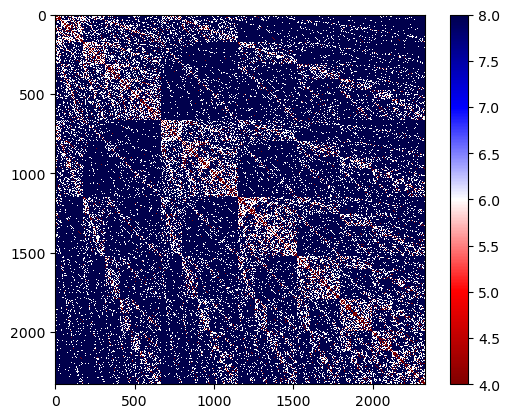

In [27]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(reduced_distmat, cmap='seismic_r', vmin=4, vmax=8, interpolation='nearest')
plt.colorbar()
plt.show()

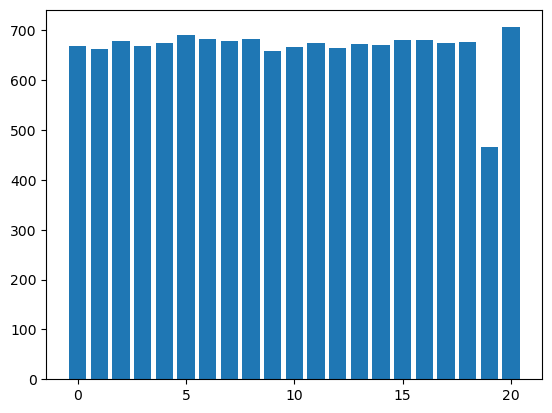

In [28]:
# check balance
bits, bit_usages = np.unique(reduced_design_barcodes, return_counts=True)
plt.figure()
plt.bar(bits, bit_usages)
plt.show()

## Select balanced subset

In [29]:
import ChromAn
reload(ChromAn.src.library_tools.design_codebook)

from ChromAn.src.library_tools.design_codebook import select_balanced_subsets

In [30]:
final_barcodes, blank_barcodes = select_balanced_subsets(reduced_design_barcodes, num_unique_probes)

- Selecting 2171 barcodes among 2330
minimum hamming distance: 4


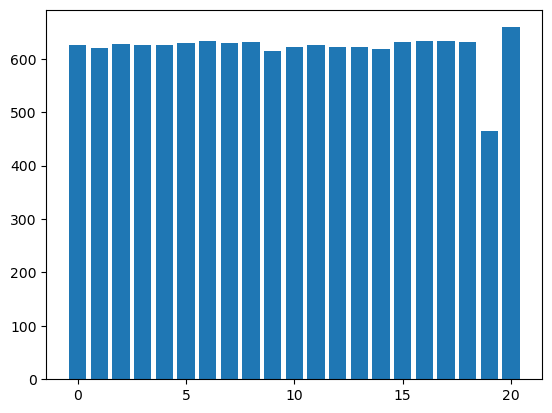

In [31]:
# check balance again:
bits, bit_usages = np.unique(final_barcodes, return_counts=True)
plt.figure()
plt.bar(bits, bit_usages)
plt.show()

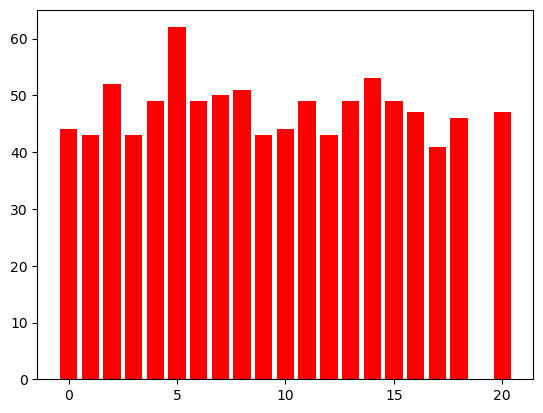

In [36]:
# check balance again:
blank_bits, blank_bit_usages = np.unique(blank_barcodes, return_counts=True)
plt.figure()
plt.bar(blank_bits, blank_bit_usages, color='r')
plt.show()

## save these encodings

In [37]:
sel_barcode_filename = os.path.join(library_folder, 'sel_merfish_barcodes.npy')
if not os.path.isfile(sel_barcode_filename):
    np.save(sel_barcode_filename, final_barcodes)
blank_barcode_filename = os.path.join(library_folder, 'blank_merfish_barcodes.npy')
if not os.path.isfile(blank_barcode_filename):
    np.save(blank_barcode_filename, blank_barcodes)

## Restart from here:

In [38]:
blank_barcode_filename = os.path.join(library_folder, 'blank_merfish_barcodes.npy')
blank_barcodes = np.load(blank_barcode_filename)
sel_barcode_filename = os.path.join(library_folder, 'sel_merfish_barcodes.npy')
final_barcodes = np.load(sel_barcode_filename)

In [39]:
blank_barcodes

array([[ 0,  1,  2,  4, 13, 15],
       [ 0,  1,  2,  7, 10, 18],
       [ 0,  1,  2,  8,  9, 17],
       [ 0,  1,  2, 14, 17, 20],
       [ 0,  1,  3,  5,  9, 16],
       [ 0,  1,  3,  6,  9, 13],
       [ 0,  1,  3, 10, 15, 20],
       [ 0,  1,  5, 11, 18, 20],
       [ 0,  1,  6,  8, 14, 16],
       [ 0,  1,  8, 11, 12, 20],
       [ 0,  1, 10, 11, 15, 18],
       [ 0,  1, 13, 14, 15, 17],
       [ 0,  1, 13, 15, 16, 18],
       [ 0,  2,  3,  6, 14, 16],
       [ 0,  2,  3,  7, 11, 14],
       [ 0,  2,  3, 12, 18, 20],
       [ 0,  2,  4,  5, 11, 14],
       [ 0,  2,  4,  6, 15, 16],
       [ 0,  2,  4,  6, 17, 18],
       [ 0,  2,  4,  8, 10, 18],
       [ 0,  2,  5,  6, 12, 17],
       [ 0,  2,  5,  7,  9, 13],
       [ 0,  2,  6,  7,  9, 18],
       [ 0,  2,  7,  8, 13, 14],
       [ 0,  2,  7,  8, 15, 16],
       [ 0,  3,  5,  6, 13, 18],
       [ 0,  3,  5,  7, 15, 16],
       [ 0,  3,  5,  8, 15, 17],
       [ 0,  3,  6,  8, 11, 12],
       [ 0,  4,  5,  7, 14, 15],
       [ 0

In [40]:
final_barcodes

array([[ 0,  1,  2,  3,  4, 20],
       [ 0,  1,  2,  3,  6,  8],
       [ 0,  1,  2,  3,  9, 18],
       ...,
       [12, 15, 16, 18, 19, 20],
       [13, 14, 15, 16, 17, 18],
       [13, 16, 17, 18, 19, 20]])

In [41]:
# generate a pandas
import pandas as pd

In [42]:
codebook = pd.DataFrame(index=[f'intbc_{_i}' for _i in np.arange(len(final_barcodes))]+[f'blank_{_j}' for _j in np.arange(len(blank_barcodes))], 
                        columns=[f"R_{_k}" for _k in np.arange(np.max(final_barcodes)+1)])

In [43]:
codebook

,R_0,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9,...,R_11,R_12,R_13,R_14,R_15,R_16,R_17,R_18,R_19,R_20
intbc_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intbc_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intbc_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intbc_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intbc_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
blank_154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blank_155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blank_156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blank_157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
from ChromAn.src.library_tools.design_codebook import barcode_to_matrix

In [45]:
codebook.iloc[:num_unique_probes,:] = barcode_to_matrix(final_barcodes)
codebook.iloc[num_unique_probes:,:] = barcode_to_matrix(blank_barcodes)

In [46]:
codebook

,R_0,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_9,...,R_11,R_12,R_13,R_14,R_15,R_16,R_17,R_18,R_19,R_20
intbc_0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
intbc_1,1,1,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
intbc_2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
intbc_3,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
intbc_4,1,1,1,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
blank_154,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,1
blank_155,0,0,0,0,0,0,0,0,1,1,...,0,0,1,1,0,0,0,0,0,1
blank_156,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,0,1
blank_157,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,1,0,1,0,1


In [47]:
library_folder

'/lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/NewTargetSites/IntBC_MERFISH_v2'

In [49]:
import time

In [56]:
time.localtime()

time.struct_time(tm_year=2024, tm_mon=2, tm_mday=6, tm_hour=12, tm_min=25, tm_sec=38, tm_wday=1, tm_yday=37, tm_isdst=0)

In [57]:
final_codebook_filename = os.path.join(library_folder, f'{time.localtime().tm_year}_{time.localtime().tm_mon}_{time.localtime().tm_mday}_full_codebook.csv')
print(final_codebook_filename)
codebook.to_csv(final_codebook_filename)

/lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/NewTargetSites/IntBC_MERFISH_v2/2024_2_6_full_codebook.csv
